# Haberman's Survival Data Set

1. The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings     Hospital on the survival of patients who had undergone surgery for breast cancer. 
2. Objective:Classify the patient whether he survived or not survived after they had undergone surgery for breast cancer.
3. 2 classes i.e, (1 = the patient survived 5 years or longer and 2 = the patient died within 5 year ) and 3 features.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

haberman = pd.read_csv("haberman.csv")   #Load the file into pandas dataframe.
print (haberman.shape)                   #Number of datapoints and features in dataset.
print (haberman.columns)                 #Column names in the given dataset.
print(haberman["status"].value_counts()) #Number of datapoints for each class.

(306, 4)
Index(['age', 'year', 'nodes', 'status'], dtype='object')
1    225
2     81
Name: status, dtype: int64


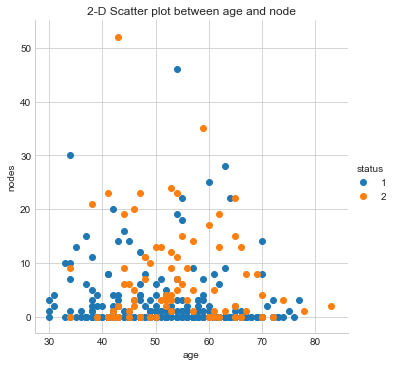

In [8]:
#2-D Scatter plot between age and node

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title('2-D Scatter plot between age and node')
plt.show();

## Observation:

1. We are unable to classify using age and nodes as their overlapping is much higher.
  

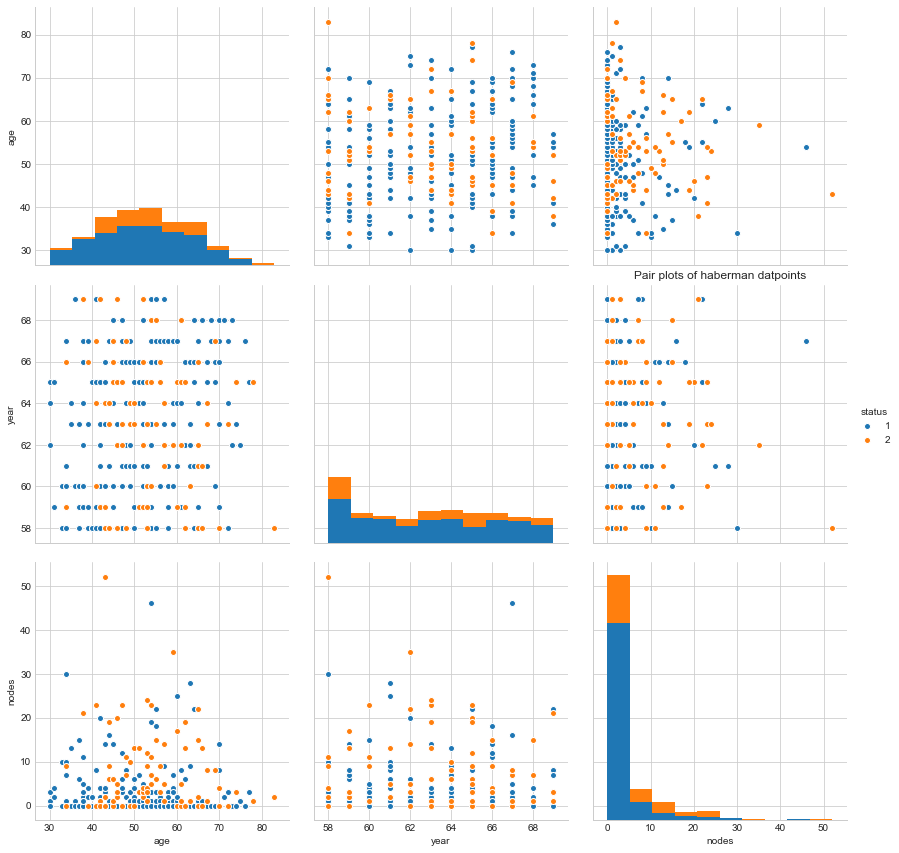

In [20]:
# Pair plot can be Pairwise scatter plot is called as Pair-Plot.
# No. of combinations possible are 3c2 = 3

plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status",vars=["age", "year", "nodes"], size=4);
plt.show();

## Observations:

1. Then plots below the diagonal are juss mirror images of the plots above the diagonal.
2. The hue is plotted as it consists of numerical data.
3. By using these features we are not able to get a conclusion as the datapoints are much overlapping.

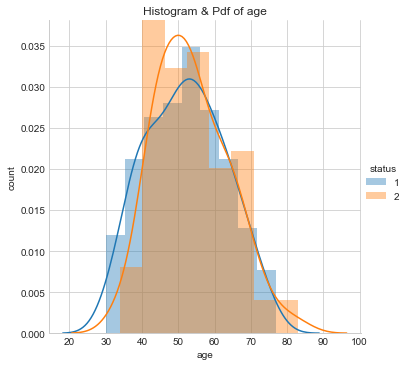

In [22]:
#Histograms and PDF


plt.close();
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.ylabel('count')
plt.title('Histogram & Pdf of age')
plt.show();


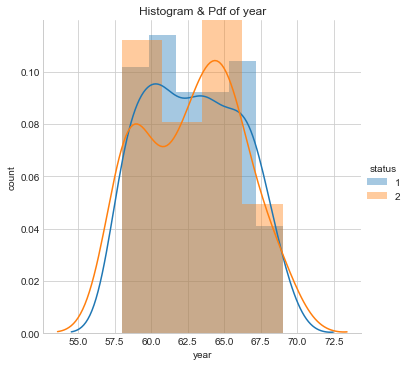

In [23]:
plt.close();
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.ylabel('count')
plt.title('Histogram & Pdf of year')
plt.show();

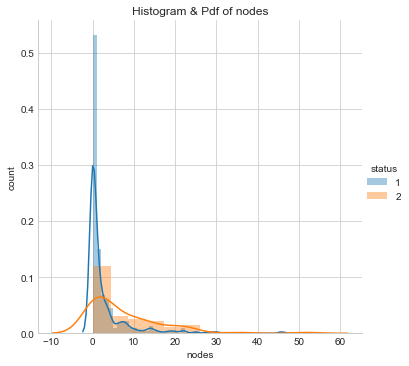

In [24]:

plt.close();
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.ylabel('count')
plt.title('Histogram & Pdf of nodes')
plt.show();

## Observations:

1. As their is much overlapping in the histograms it is not possible to classify.
2. Even by using if-else condition its hard to classify.

[0.14052288 0.32352941 0.31372549 0.19281046 0.02941176]
[30.  40.6 51.2 61.8 72.4 83. ]


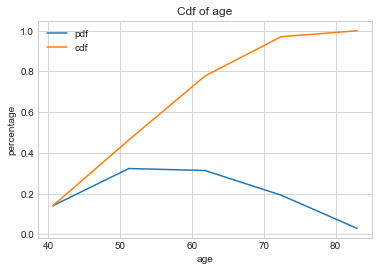

In [40]:
#Cumulative Distribution Function (CDF)
import matplotlib.pyplot as plt
plt.close();
counts, bin_edges = np.histogram(haberman['age'], bins=5)

#plotting pdf
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.legend();
plt.ylabel('percentage')
plt.xlabel('age')
plt.title('Cdf of age')
plt.show();

## Observations:

1. 60% of people have their ages less than 56 (from cdf curve).
2. 20% of people lie between the ages 50-60 (from pdf curve).
 

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


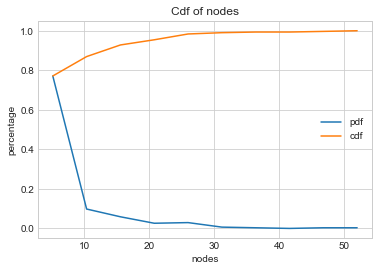

In [41]:
plt.close();
counts, bin_edges = np.histogram(haberman['nodes'], bins=10)

#plotting pdf
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.legend();
plt.ylabel('percentage')
plt.title('Cdf of nodes')
plt.xlabel('nodes')
plt.show();

## Observations:

1. 79% of people have axillary nodes  less than 10 (from cdf curve).


[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


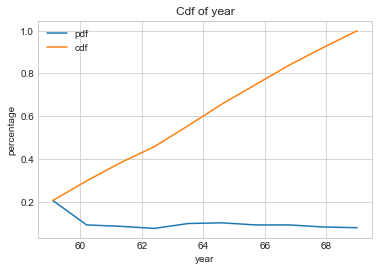

In [42]:
plt.close();
counts, bin_edges = np.histogram(haberman['year'], bins=10)

#plotting pdf
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.legend();
plt.ylabel('percentage')
plt.title('Cdf of year')
plt.xlabel('year')
plt.show();

## Observations:

1. 10% of people had their operations in the year 64-66 (from pdf curve).
2. About 79% of people got their operations done before the year 1966  (from cdf curve).
 

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


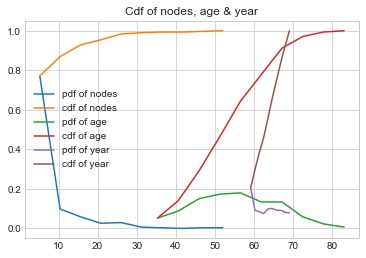

In [45]:
#cdf's of all the features

plt.close();
counts, bin_edges = np.histogram(haberman['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf of nodes')
plt.plot(bin_edges[1:], cdf,label='cdf of nodes')
plt.legend();

counts, bin_edges = np.histogram(haberman['age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf of age')
plt.plot(bin_edges[1:], cdf,label='cdf of age')
plt.legend();

counts, bin_edges = np.histogram(haberman['year'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf of year')
plt.plot(bin_edges[1:], cdf,label='cdf of year')
plt.legend();
plt.title('Cdf of nodes, age & year')
plt.show();

## Observation:
1. It is difficult to classify from the features given as their rate of overlapping is high.

In [148]:
#Mean 
print("Mean of age is:",np.mean(haberman["age"]))
print("Mean of year is:",np.mean(haberman["year"]))
print("Mean of year is:",np.mean(np.append(haberman["year"],9802)))
print("Mean of nodes is:",np.mean(haberman["nodes"]))

#Standard-deviation
print("\nSD of age is:",np.std(haberman["age"]))
print("SD of year is:",np.std(haberman["year"]))
print("SD of nodes is:",np.std(haberman["nodes"]))

#Median
print("\nMedain of age is:",np.median(haberman["age"]))
print("Median of year is:",np.median(haberman["year"]))
print("Medain of year is:",np.median(np.append(haberman["year"],9802)))
print("Medain of nodes is:",np.median(haberman["nodes"]))




Mean of age is: 52.45751633986928
Mean of year is: 62.85294117647059
Mean of year is: 94.57654723127035
Mean of nodes is: 4.026143790849673

SD of age is: 10.78578520363183
SD of year is: 3.244090833563246
SD of nodes is: 7.177896092811152

Medain of age is: 52.0
Median of year is: 63.0
Medain of year is: 63.0
Medain of nodes is: 1.0


## Observation:
1. From above we can observe that when an outlier is introduced the mean changes it is not stable.
2. Median stays same even when an outlier is introduced,which is more reliable.

In [168]:
# Percentiles
print("50th percentile of age is:",np.percentile(haberman["age"],25))
print("90th percentile of year is:",np.percentile(haberman["year"],90))
print("10th percentile of nodes is:",np.percentile(haberman["nodes"],10))

print("\nQuantiles:\n")
print(np.percentile(haberman["age"],np.arange(25, 100, 25)))
print(np.percentile(haberman["year"],np.arange(50, 100, 25)))
print(np.percentile(haberman["nodes"],np.arange(0, 100, 25)))

from statsmodels import robust
print ("\nMedian Absolute Deviation:\n")
print(robust.mad(haberman["age"]))
print(robust.mad(haberman["year"]))
print(robust.mad(haberman["nodes"]))

50th percentile of age is: 44.0
90th percentile of year is: 67.0
10th percentile of nodes is: 0.0

Quantiles:

[44.   52.   60.75]
[63.   65.75]
[0. 0. 1. 4.]

Median Absolute Deviation:

11.860817748044816
4.447806655516806
1.482602218505602


## Obseravtions:
1. 25th percentile is nothing but a Quantile.

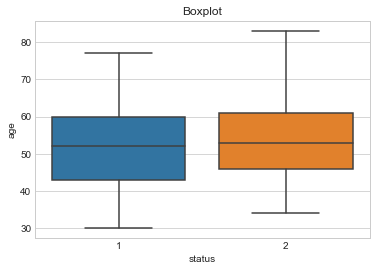

In [31]:
#Box-plot with whiskers
plt.close();
sns.boxplot(x='status',y='age', data=haberman)
plt.title('Boxplot')
plt.show();

## Observations:
1. 25th,50th and 75th percentiles are 43,52 and 60 approximately (for class 1).
2. Min value is 30 and Max value is 77.
3. 25th,50th and 75th percentiles are 46,53 and 61 approximately (for class 2).
4. Min value is 34 and Max value is 83.
5. Classification is not possible.

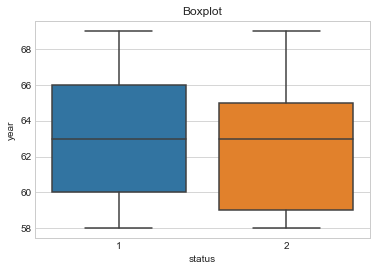

In [32]:
plt.close();
sns.boxplot(x='status',y='year', data=haberman)
plt.title('Boxplot')
plt.show();

## Observations:
1. 25th,50th and 75th percentiles are 60,63 and 66 approximately (for class 1).
2. Min value is 58 and Max value is 74.
3. 25th,50th and 75th percentiles are 59,63 and 65 approximately (for class 2).
4. Min value is 58 and Max value is 74.

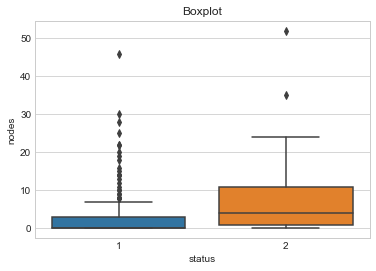

In [33]:
plt.close();
sns.boxplot(x='status',y='nodes', data=haberman)
plt.title('Boxplot')
plt.show();

## Observations:
1. 25th,50th and 75th percentiles are 0,1 and 3 approximately (for class 1).
2. Min value is 0 and Max value is 8.
3. 25th,50th and 75th percentiles are 1,4 and 11 approximately (for class 2).
4. Min value is 0 and Max value is 24.

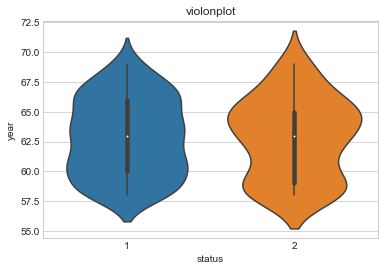

In [34]:
#Violin plot
plt.close();
sns.violinplot(x="status", y="year", data=haberman)
plt.title('violonplot')
plt.show();


## Observations:
1. The violin plot is a combination of blox plot and pdf.
2. 25th,50th and 75th percentiles are 60,63 and 66 approximately (for class 1). 
3. 25th,50th and 75th percentiles are 59,63 and 65 approximately (for class 2).


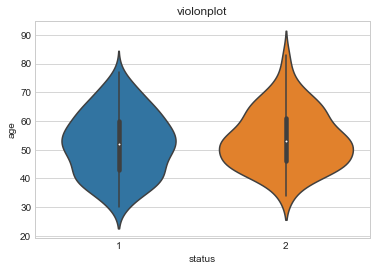

In [35]:
plt.close();
sns.violinplot(x="status", y="age", data=haberman)
plt.title('violonplot')
plt.show();


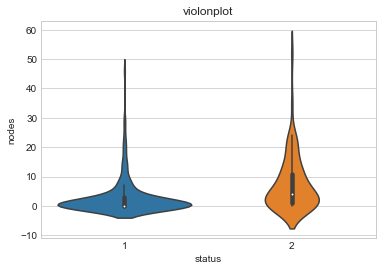

In [36]:
plt.close();
sns.violinplot(x="status", y="nodes", data=haberman)
plt.title('violonplot')
plt.show();


# Conslusion:
1. Classification is hardly possible with the given datapoints as their overlapping rate is much higher.
